# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/Machine_Learning_com_Python/housing.csv',
                    sep=',', encoding='iso-8859-1')

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [ ]:
df.shape

(489, 4)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Valores Missing (NAN)

In [ ]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos.**

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Análise dos outliers**

In [ ]:
import plotly.express as px

In [ ]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [ ]:
import matplotlib.pyplot as plt

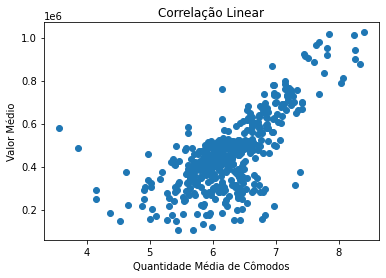

In [ ]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)

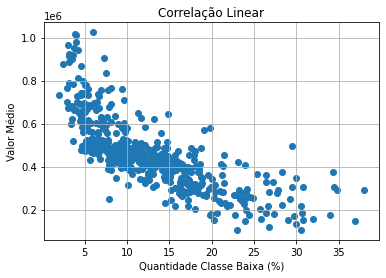

In [ ]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(True)


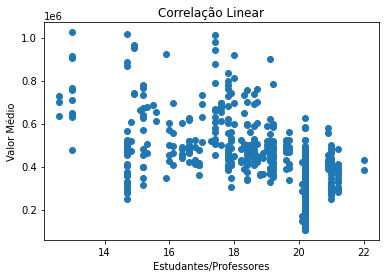

In [ ]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)

In [ ]:
import seaborn as sns

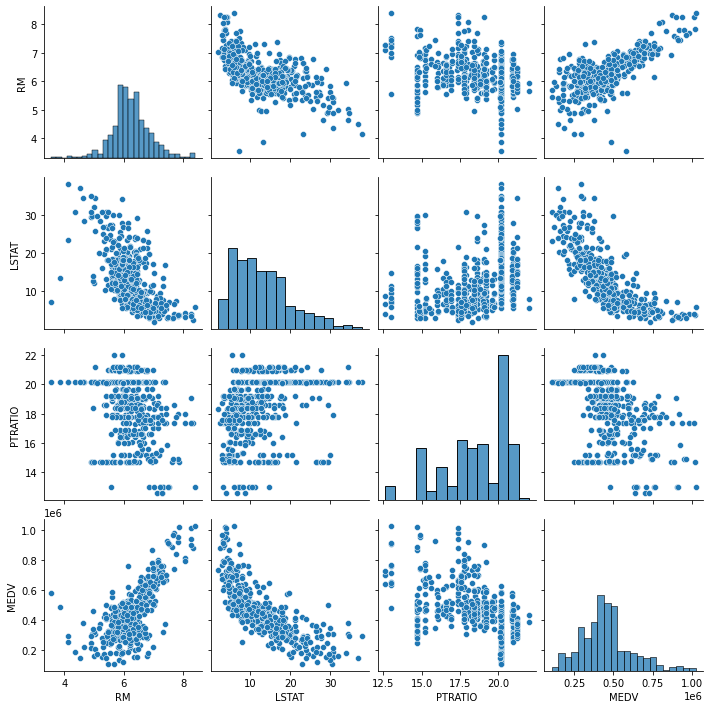

In [ ]:
sns.pairplot(df);

### Análise da Normalidade

Gráfico QQ-Plot

In [ ]:
import scipy.stats as stats

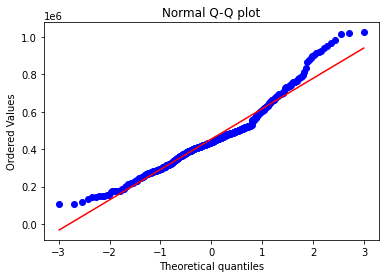

In [ ]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df,  x = "MEDV", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

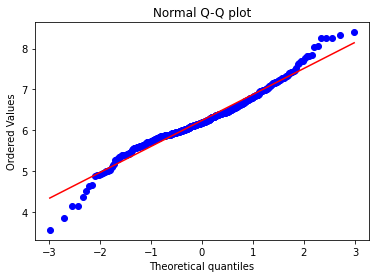

In [ ]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "RM", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Quantidade de cômodos') 
hist.show()

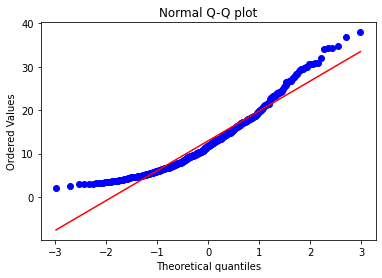

In [ ]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "LSTAT", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Quantidade de Classe Baixa (%)') 
hist.show()

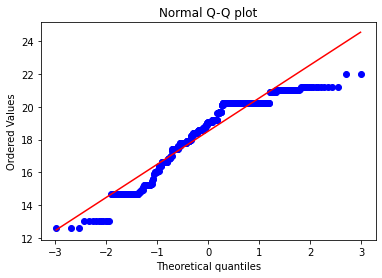

In [ ]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "PTRATIO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Relação Estudantes/Professores') 
hist.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
stats.shapiro(df.MEDV)

(0.9596613645553589, 2.5757390664793434e-10)

In [ ]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9596613645553589
p-valor: 2.5757390664793434e-10


In [ ]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.970818281173706
p-valor: 2.7105865996190914e-08


In [ ]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9371760487556458
p-valor: 1.6900520425407878e-13


In [ ]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9064712524414062
p-valor: 9.058795024736088e-17


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.11370576407672117
p-valor: 1.22863402008496e-16


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06394344399233598
p-valor: 5.880258602737371e-05


### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# Pearson
#coef,p = stats.pearsonr(df.MEDV, df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
# Spearman
coef,p = stats.spearmanr(df.MEDV, df.PTRATIO)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: -0.5592761164167336
p-valor: 1.3794858687631326e-41


In [ ]:
# Kendall
#coef,p = stats.kendalltau(df.MEDV,df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
correlacoes = df.corr(method='spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


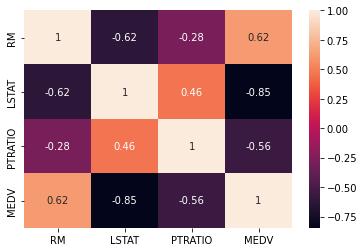

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

### Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

In [ ]:
x1 = df.iloc[:,0:1].values
x1

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

In [ ]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

In [ ]:
# Coeficiente Angular
reg_linear1.coef_

**Equação: Valor = -626510,27 + 173771,45.número_cômodos**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

In [ ]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [ ]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### Valor médio (MEDV) em função da classe social (LSTAT)

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x2 = df.iloc[:,1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [ ]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [ ]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [ ]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

681977.7451055486

In [ ]:
# Coeficiente Angular
reg_linear2.coef_

array([-17263.75010515])

**Equação: Valor = 681977,75 - 17263,75.LSTAT**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

0.5688289563355992

In [ ]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5

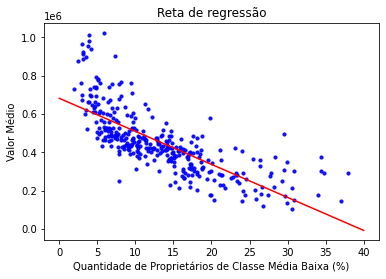

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [ ]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

In [ ]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

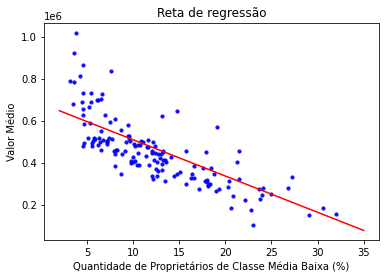

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear2.predict([[25]])
valor_casa

array([250383.99247685])

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

76340.55192245146

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245146

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

9863567949.634668

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

99315.49702657017

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

### **Avaliando a Regressão Linear Simples com Statsmodels**

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x2 = df.iloc[:,1:2].values
x2

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
# Criação do modelo
regressao = smf.ols('y ~ x2', data = df).fit()

In [ ]:
residuos = regressao.resid
residuos

#### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9171054363250732
p-valor: 9.782326333115975e-16


In [ ]:
import scipy.stats as stats

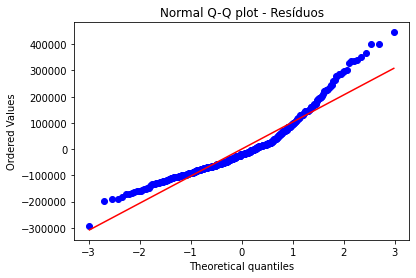

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

#### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

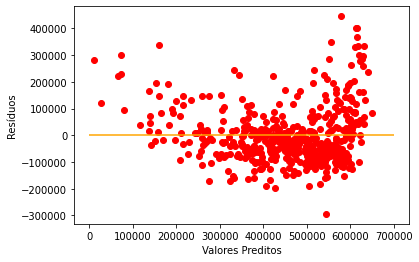

In [ ]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=700000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 5.3825533640267285
p-valor: 0.020339089399132346
f-valor: 5.420200421872106
f_p-valor: 0.020313692181464678


#### **Outliers nos resíduos**

(Entre -3 e 3)

In [ ]:
outliers = regressao.outlier_test()

In [ ]:
outliers.max()

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

**Modelo não consistente**

#### **Modelo de Regressão Linear**

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           1.93e-93
Time:                        22:39:16   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

**R^2 ajustado = 0,578**

In [ ]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  684138.493068
x2         -17759.048327


**Equação: Valor = 684138,49 - 17759.04.LSTAT**

In [ ]:
regressao.params

Intercept    684138.493068
x2           -17759.048327
dtype: float64

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
regressao.predict()

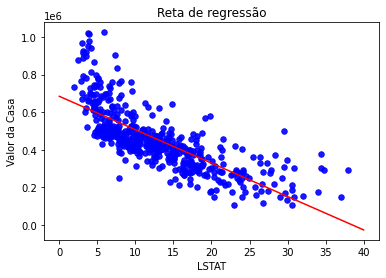

In [ ]:
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=30, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor da Casa')
plt.xlabel('LSTAT')
plt.show()

## **REGRESSÃO LINEAR MÚLTIPLA**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

In [ ]:
multipla.intercept_

In [ ]:
multipla.coef_

In [ ]:
print("Equação: Valor = {:.2f} + ({:.2f})*RM + ({:.2f})*LSTAT + ({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

In [ ]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

**TESTE**

In [ ]:
previsoes = multipla.predict(x_teste)
previsoes

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6,20,12]])
valor_casa

**MÉTRICAS**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

### **Avaliando a Regressão Linear Múltipla com Statsmodels**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
# Criação do modelo
modelo = smf.ols('MEDV ~ RM + LSTAT + PTRATIO', data = df).fit()

In [ ]:
residuos = modelo.resid
residuos

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Length: 489, dtype: float64

#### Teste de Normalidade dos resíduos

In [ ]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9633497595787048
p-valor: 1.0876398670589538e-09


In [ ]:
import matplotlib.pyplot as plt

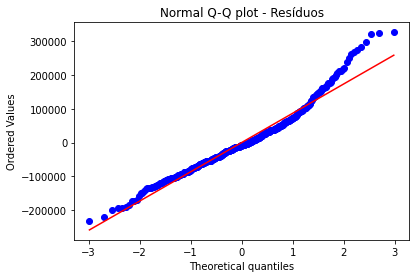

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

#### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

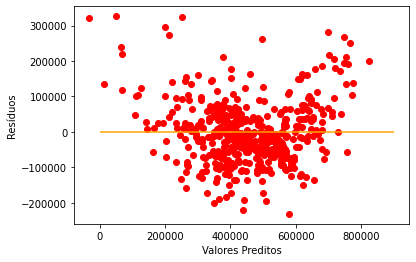

In [ ]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=900000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
from statsmodels.compat import lzip

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo.resid, modelo.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 14.866517741157674
p-valor: 0.0019343456956172854
f-valor: 5.069079611723632
f_p-valor: 0.0018260051160026575


#### **Outliers nos resíduos**

(Entre -3 e 3)

In [ ]:
outliers = modelo.outlier_test()

In [ ]:
outliers.max()

student_resid    3.887418
unadj_p          0.999502
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers.min()

student_resid   -2.648018
unadj_p          0.000115
bonf(p)          0.056456
dtype: float64

#### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [ ]:
variaveis = df[['RM','LSTAT','PTRATIO']]

In [ ]:
variaveis.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [ ]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,RM,LSTAT,PTRATIO
RM,1.000000,-0.612033,-0.304559
LSTAT,-0.612033,1.000000,0.360445
PTRATIO,-0.304559,0.360445,1.000000


#### **Análise do Modelo**

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          9.96e-133
Time:                        13:23:59   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

**Equação:** Valor da casa = 4.155e+05 + 8.657e+04.RM - 1.085e+04.LSTAT - 1.949e+04.PTRATIO

In [ ]:
# Criando uma coluna com previsão
df['previsao'] = modelo.fittedvalues

In [ ]:
df.head()

,RM,LSTAT,PTRATIO,MEDV,previsao
0,6.575,4.98,15.3,504000.0,632371.739762
1,6.421,9.14,17.8,453600.0,525177.148313
2,7.185,4.03,17.8,728700.0,646753.118080
3,6.998,2.94,18.7,701400.0,624848.295870
4,7.147,5.33,18.7,760200.0,611816.592536


In [ ]:
import seaborn as sns

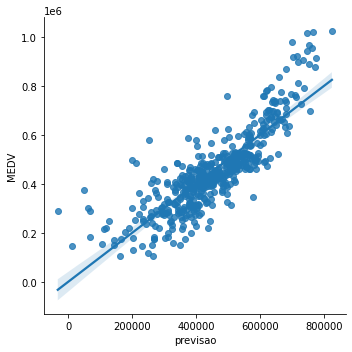

In [ ]:
sns.lmplot(x='previsao', y='MEDV', data=df);

## **REGRESSÃO POLINOMIAL**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 

Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

In [ ]:
x1 = df.iloc[:,0:1].values
x1

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [ ]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

In [ ]:
polinomial = LinearRegression()

In [ ]:
polinomial.fit(x_poly, y_treino)

In [ ]:
previsoes_treino = polinomial.predict(x_poly)

In [ ]:
polinomial.coef_

In [ ]:
polinomial.intercept_

**Equação:**

Valor = 1640107 - 568528.11*RM + 60092.59*RM^2

In [ ]:
numeros = np.linspace(3,9.84,342)
numeros

In [ ]:
numeros.shape

In [ ]:
valor = 1640107 -568528.11*numeros + 60092.59*numeros**2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valores das Casas")
plt.title("Previsão dos valores das casas: dados de treino")
plt.plot(numeros, valor);

In [ ]:
# Fazendo previsões para valores distintos
comodos = 6
valor = 1640107 -568528.11*comodos + 60092.59*comodos**2
valor

In [ ]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

**TESTE**

In [ ]:
numeros2 = np.linspace(3,8.88,147)
numeros2

In [ ]:
numeros2.shape

In [ ]:
valor2 = 1640107 -568528.11*numeros2 + 60092.59*numeros2**2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valor Casas")
plt.title("Previsão dos valores das casas: dados de teste")
plt.plot(numeros2, valor2);

In [ ]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

In [ ]:
polinomial_teste = LinearRegression()

In [ ]:
polinomial_teste.fit(x_poly_teste, y_teste)

In [ ]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

In [ ]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

## **REGRESSÃO POR VETORES DE SUPORTE**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

In [ ]:
SVR.score(x_treino, y_treino)

In [ ]:
SVR.score(x_teste, y_teste)

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

In [ ]:
SVR2.score(x_treino_scaler, y_treino_scaler)

**TESTE**

In [ ]:
SVR2.score(x_teste_scaler, y_teste_scaler)

In [ ]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

In [ ]:
y_teste_scaler

**Revertendo a transformação**

In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [ ]:
y_teste_inverse

In [ ]:
previsoes_inverse

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

### **Validação Cruzada**

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [ ]:
independente_scaler

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html#regression 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
y_treino.shape, y_teste.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

In [ ]:
arvore.score(x_treino, y_treino)

**TESTE**

In [ ]:
arvore.score(x_teste, y_teste)

In [ ]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

(489, 3)

In [ ]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
dependente.shape

(489,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [ ]:
random.score(x_treino, y_treino)

0.9160346630571496

**TESTE**

In [ ]:
random.score(x_teste, y_teste)

In [ ]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

## **REGRESSÃO COM XGBOOST**

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

In [ ]:
xgboost.score(x_treino, y_treino)

**TESTE**

In [ ]:
xgboost.score(x_teste, y_teste)

In [ ]:
previsoes_teste = xgboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = xgboost.predict([[6,20,12]])
valor_casa

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

## **REGRESSÃO COM LIGHT GBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html 

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

In [ ]:
lgbm.score(x_treino, y_treino)

**TESTE**

In [ ]:
lgbm.score(x_teste, y_teste)

In [ ]:
previsoes_teste = lgbm.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = lgbm.predict([[8,12,25]])
valor_casa

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

## **REGRESSÃO COM CATBOOST**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor 

In [ ]:
#Instalação
!pip install catboost

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
from catboost.core import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

In [ ]:
catboost.score(x_treino, y_treino)

**TESTE**

In [ ]:
catboost.score(x_teste, y_teste)

In [ ]:
previsoes_teste = catboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = catboost.predict([[5,18,20]])
valor_casa

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

**REGRESSÃO COM CATBOOST:** R^2 = 0,90/0,84; RMSE = 69053,3 R^2 Validação Cruzada: 83,40%.

# **Salvando dados para Deploy**

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
np.savetxt('independente.csv', independente, delimiter=',')

In [ ]:
np.savetxt('dependente.csv', dependente, delimiter=',')

# **DESAFIO 2**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE REGRESSÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/mirichoi0218/insurance/code